In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Constants
OLD_FOOD_CSV = 'data/wheat_rice_maize_1961-2013.csv'
NEW_FOOD_CSV = 'data/wheat_rice_maize_2010-2020.csv'

POPULATION_CSV = 'data/population_world_1950-2021.csv'

LOW_YEAR = 1961
HIGH_YEAR = 2020


In [2]:
# Get food data
old_food = pd.read_csv(OLD_FOOD_CSV)
new_food = pd.read_csv(NEW_FOOD_CSV)
food = pd.concat([old_food, new_food]).reset_index()

In [3]:
# Food masks
items = ['wheat', 'rice', 'maize']
def get_item_mask(item: str, df: pd.DataFrame):
    food_masks = dict({
        'wheat': df['Item'].str.contains('Wheat'),
        'rice': df['Item'].str.contains('Rice'),
        'maize': df['Item'].str.contains('Maize')
    })
    return food_masks[item]

In [4]:
# Product balance masks
balances = ['total', 'food', 'loss']
def get_balance_mask(balance: str, df: pd.DataFrame): 
    balance_masks = dict({
        'total': df['Element'].str.contains('Production'),
        'food': df['Element'].str.contains('Food'),
        'loss': df['Element'].str.contains('Losses')
    })
    return balance_masks[balance]


In [5]:
# Normalize units
t_1000 = food['Unit'].str.contains('1000')
food.loc[t_1000, 'Value'] *= 1000
food.loc[t_1000, 'Unit'] = 't'

In [6]:
# Average year overlaps
lo_yr, hi_yr = (2010, 2013)

for i in np.linspace(start=lo_yr, stop=hi_yr, num=(hi_yr - lo_yr + 1)):
    for item in items:
        for balance in balances:
            overlap = food.loc[food['Year'].eq(int(i)) & get_item_mask(item, food) & get_balance_mask(balance, food), 'Value']

            inds = overlap.index.to_list()
            min_ind = min(inds)
            inds.remove(min_ind)

            food.loc[min_ind, 'Value'] = np.average(overlap.to_list())
            food.drop(index=inds, inplace=True)


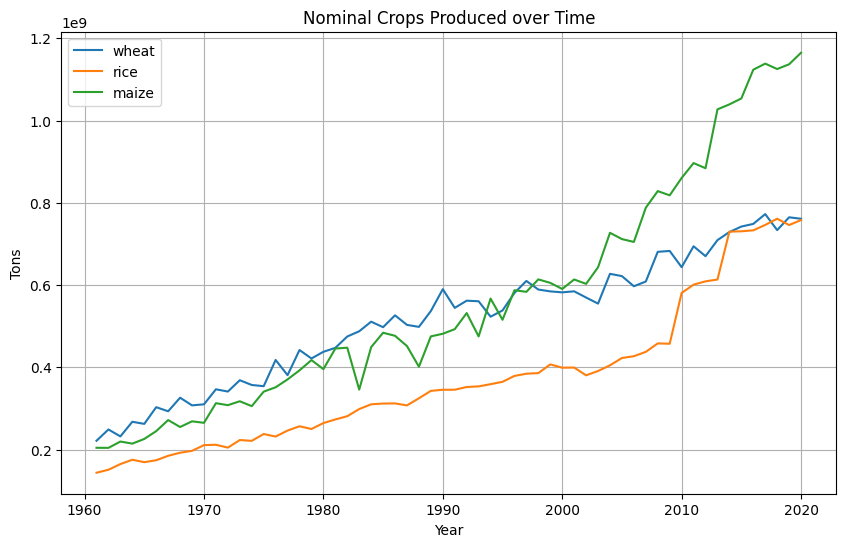

In [7]:
# Nominal crop total production
plt.figure(figsize=(10,6))

for item in items:
    nominal_total = food[get_item_mask(item, food) & get_balance_mask('total', food)].copy().reset_index()
    plt.plot(nominal_total['Year'], nominal_total['Value'], label=item)

plt.xlabel('Year')
plt.ylabel('Tons')
plt.title('Nominal Crops Produced over Time')

plt.legend(loc='best')
plt.grid(True)
plt.show()

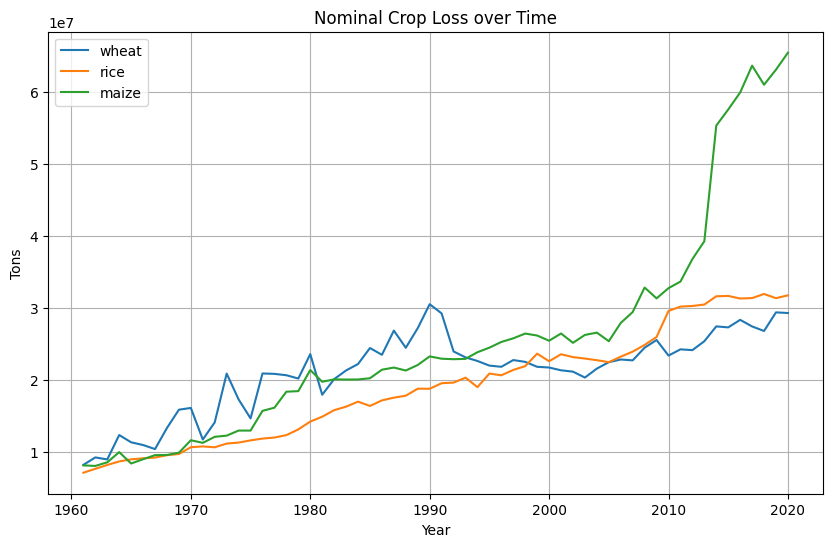

In [17]:
# Nominal crop losses
plt.figure(figsize=(10,6))

for item in items:
    nominal_loss = food[get_item_mask(item, food) & get_balance_mask('loss', food)].copy().reset_index()
    plt.plot(nominal_loss['Year'], nominal_loss['Value'], label=item)

plt.xlabel('Year')
plt.ylabel('Tons')
plt.title('Nominal Crop Loss over Time')

plt.legend(loc='best')
plt.grid(True)
plt.show()

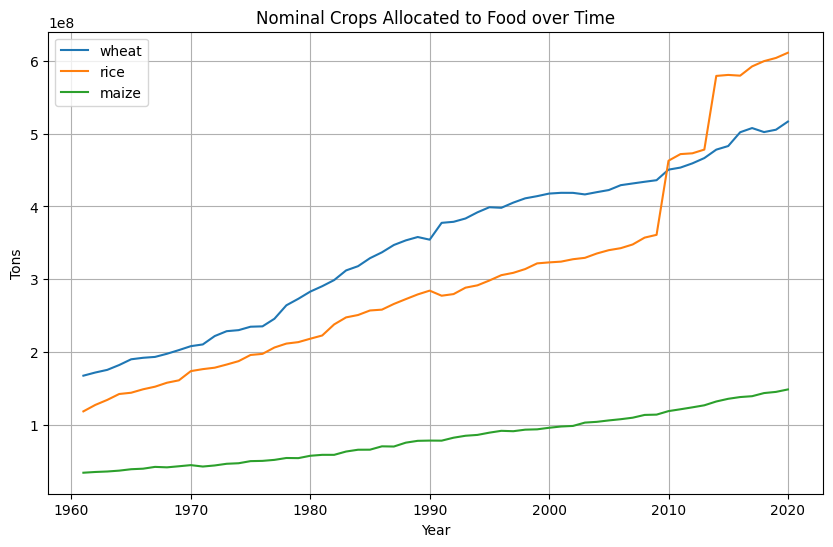

In [9]:
# Nominal crop human allocation
plt.figure(figsize=(10,6))

for item in items:
    nominal_food = food[get_item_mask(item, food) & get_balance_mask('food', food)].copy().reset_index()
    plt.plot(nominal_food['Year'], nominal_food['Value'], label=item)

plt.xlabel('Year')
plt.ylabel('Tons')
plt.title('Nominal Crops Allocated to Food over Time')

plt.legend(loc='best')
plt.grid(True)
plt.show()

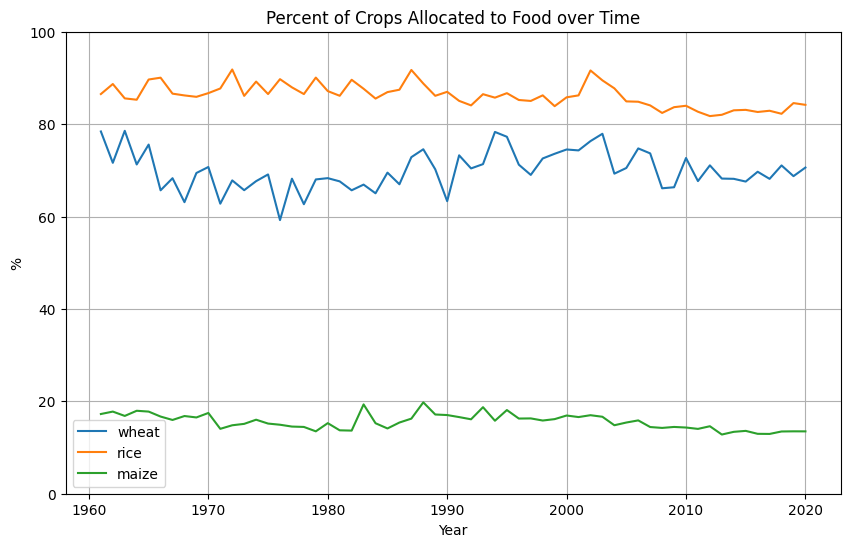

In [10]:
# Crop food allocation as a percentage
plt.figure(figsize=(10,6))

for item in items:
    total = food[get_item_mask(item, food) & get_balance_mask('total', food)].copy().reset_index()
    loss = food[get_item_mask(item, food) & get_balance_mask('loss', food)].copy().reset_index()
    allocated = food[get_item_mask(item, food) & get_balance_mask('food', food)].copy().reset_index()
    
    plt.plot(total['Year'], allocated['Value'].divide(total['Value'].subtract(loss['Value'])).multiply(100), label=item)

plt.xlabel('Year')
plt.ylabel('%')
plt.title('Percent of Crops Allocated to Food over Time')

plt.ylim(0, 100)
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [11]:
# Get population data
pop = pd.read_csv(POPULATION_CSV)

In [12]:
# Normalize units
no_1000 = pop['Unit'].str.contains('1000')
pop.loc[no_1000, 'Value'] *= 1000
pop.loc[no_1000, 'Unit'] = 'No'

In [13]:
# Filter unused years
used_years = (pop['Year'] >= LOW_YEAR) & (pop['Year'] <= HIGH_YEAR)
pop = pop[used_years].copy().reset_index()

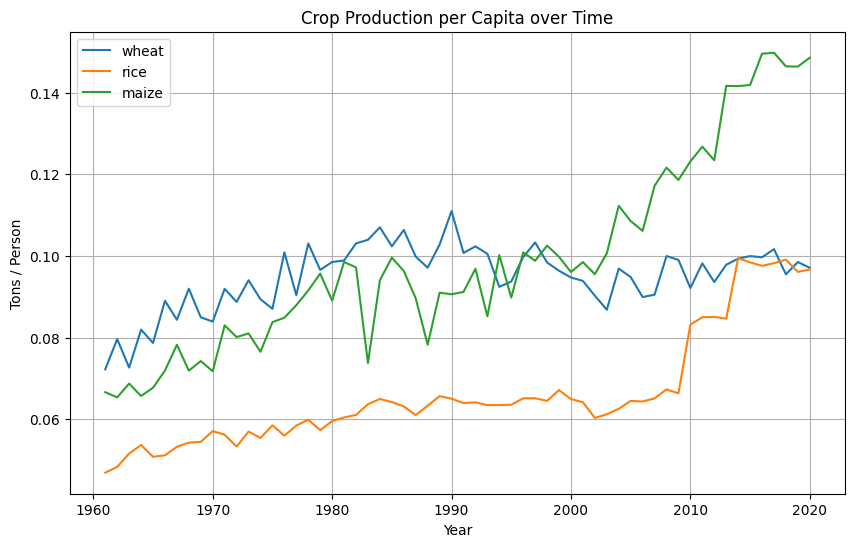

In [14]:
# Crop production per capita
plt.figure(figsize=(10,6))

for item in items:
    nominal_total = food[get_item_mask(item, food) & get_balance_mask('total', food)].copy().reset_index()
    plt.plot(nominal_total['Year'], nominal_total['Value'].divide(pop['Value']), label=item)

plt.xlabel('Year')
plt.ylabel('Tons / Person')
plt.title('Crop Production per Capita over Time')

plt.legend(loc='best')
plt.grid(True)
plt.show()

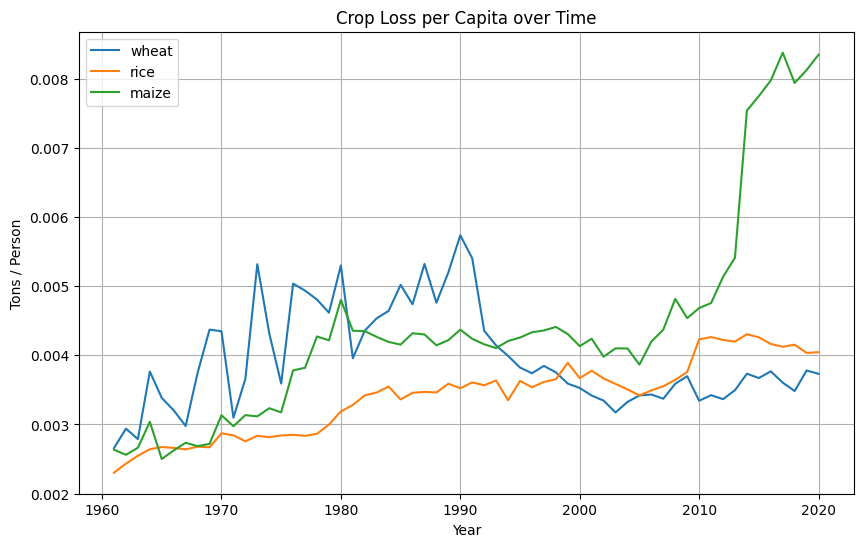

In [15]:
# Crop loss per capita
plt.figure(figsize=(10,6))

for item in items:
    nominal_loss = food[get_item_mask(item, food) & get_balance_mask('loss', food)].copy().reset_index()
    plt.plot(nominal_loss['Year'], nominal_loss['Value'].divide(pop['Value']), label=item)

plt.xlabel('Year')
plt.ylabel('Tons / Person')
plt.title('Crop Loss per Capita over Time')

plt.legend(loc='best')
plt.grid(True)
plt.show()

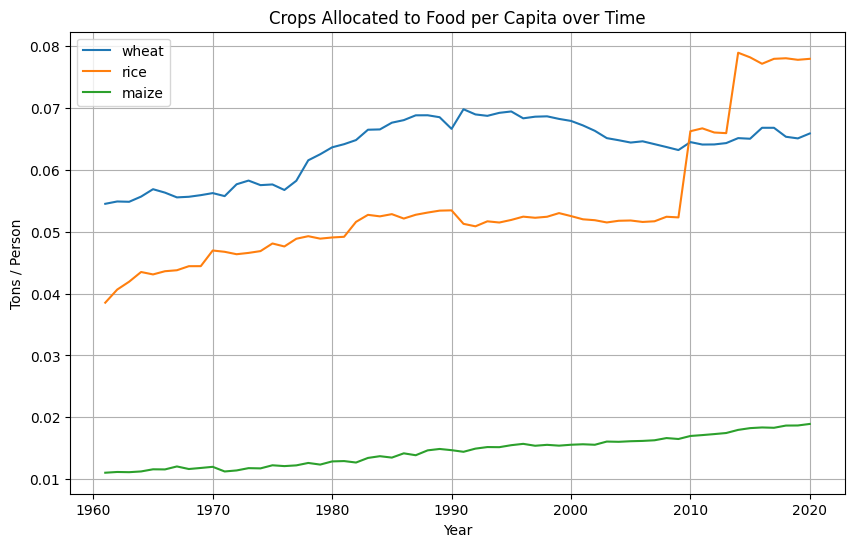

In [16]:
# Crop food allocation per capita
plt.figure(figsize=(10,6))

for item in items:
    nominal_food = food[get_item_mask(item, food) & get_balance_mask('food', food)].copy().reset_index()
    plt.plot(nominal_food['Year'], nominal_food['Value'].divide(pop['Value']), label=item)

plt.xlabel('Year')
plt.ylabel('Tons / Person')
plt.title('Crops Allocated to Food per Capita over Time')

plt.legend(loc='best')
plt.grid(True)
plt.show()